## Loading the environments

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

## Importing the packages

In [2]:
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END , MessageGraph 
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage
from typing import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

import datetime

In [3]:
model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

## Some utility functions

In [4]:
# to display the graph
def display_graph(app):
    # this function will display the graph of the app
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        # This requires some extra dependencies and is optional
        print(e)



# To stream the output of the app
def stream_output(app, input):
    for output in app.stream(input):
        for key,value in output.items():
            print(f"here is output from {key}")
            print("_______")
            print(value)
            print("\n")

In [5]:
#defining the state
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
model.invoke("What is the weather in hyderabad?")

AIMessage(content="I don't have real-time access to current weather data. To get the latest weather information for Hyderabad, you can check a reliable weather website or app like Weather.com, AccuWeather, or use a voice assistant on your device.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 15, 'total_tokens': 61, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-Bz3T7x1qmcfIxXqlWRMxwycqEj2eV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--048bad31-b74c-4075-b09c-eed8cad669ca-0', usage_metadata={'input_tokens': 15, 'output_tokens': 46, 'total_tokens': 61, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'a

## Part 1: Access to tools

In [7]:
# tavily seaarch tool ---> for api go to https://app.tavily.com/home and generate an api key
from langchain_tavily import TavilySearch

search_tool=TavilySearch(max_results=2)
search_tool.invoke("What is langgraph")


{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
   'title': 'LangGraph Tutorial: What Is LangGraph and How to Use It?',
   'content': 'LangGraph is a library within the LangChain ecosystem that provides a framework for defining, coordinating, and executing multiple LLM agents (or chains) in a structured and efficient manner. By managing the flow of data and the sequence of operations, LangGraph allows developers to focus on the high-level logic of their applications rather than the intricacies of agent coordination. Whether you need a chatbot that can handle various types of user requests or a multi-agent system that performs complex tasks, LangGraph provides the tools to build exactly what you need. LangGraph significantly simplifies the development of complex LLM applications by providing a structured framework for managing state and coordinating agent interaction

In [8]:
search_tool.invoke("What is the weather in hyderabad?")

{'query': 'What is the weather in hyderabad?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Weather in Hyderabad',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Hyderabad', 'region': 'Telangana', 'country': 'India', 'lat': 17.3753, 'lon': 78.4744, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1753888278, 'localtime': '2025-07-30 20:41'}, 'current': {'last_updated_epoch': 1753887600, 'last_updated': '2025-07-30 20:30', 'temp_c': 24.4, 'temp_f': 75.9, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 11.9, 'wind_kph': 19.1, 'wind_degree': 269, 'wind_dir': 'W', 'pressure_mb': 1008.0, 'pressure_in': 29.77, 'precip_mm': 0.02, 'precip_in': 0.0, 'humidity': 89, 'cloud': 75, 'feelslike_c': 26.1, 'feelslike_f': 79.0, 'windchill_c': 24.8, 'windchill_f': 76.6, 'heatindex_c': 26.5, 'heatindex_f': 79.6, 'dewpoint_c': 19.6, 'dewpoint_f': 67.

## lets create 6 tools

In [9]:

#defining search tool
search_tool = TavilySearch(max_results=2)


def search_web(user_question):
    """
    This function will search a web search for the user question
    Args:
        user_question (str): The question to search
    Returns:
        search_results (list): The search results
    """
    search_results = search_tool.invoke(user_question)["results"]
    return search_results

#mathematical tool - addition
def add_numbers(a,b):
    """
    This function will add two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The sum of the two numbers
    """
    return a+b

#mathematical tool - subtraction
def subtract_numbers(a,b):
    """
    This function will subtract two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The difference of the two numbers
    """
    return a-b

#mathematical tool - multiplication
def multiply_numbers(a,b):
    """
    This function will multiply two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The product of the two numbers
    """
    return a*b

#mathematical tool - division
def divide_numbers(a,b):
    """
    This function will divide two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The quotient of the two numbers
    """
    return a/b


# tooll to get the current time
def get_current_time():
    """
    This function will get the current time
    Returns:
        result (str): The current time
    """
    return datetime.now().strftime("%H:%M:%S")


In [14]:
tools_list = [search_web, add_numbers, subtract_numbers, multiply_numbers, divide_numbers, get_current_time]

In [15]:
#bind the tools with llm
llm_with_tool = model.bind_tools(tools_list)

In [12]:
llm_with_tool

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x118892660>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1188930e0>, root_client=<openai.OpenAI object at 0x11871f770>, root_async_client=<openai.AsyncOpenAI object at 0x118892e40>, model_name='gpt-4.1-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'search_web', 'description': 'This function will search a web search for the user question\nArgs:\n    user_question (str): The question to search\nReturns:\n    search_results (list): The search results', 'parameters': {'properties': {'user_question': {}}, 'required': ['user_question'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add_numbers', 'description': 'This function will add two numbers\nArgs:\n    a (int): The first number\n    b (int): The second number\nReturns:\n  

In [16]:
#defining the nodes 
def tool_calling_llm(state:State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}



In [ ]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", END)

app = workflow.compile()

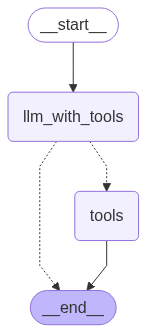

In [18]:
display_graph(app)

In [20]:
response = app.invoke({"messages": "What is the current tariff put by USA on india?"})

In [21]:
response

{'messages': [HumanMessage(content='What is the current tariff put by USA on india?', additional_kwargs={}, response_metadata={}, id='e3dd68a0-7c09-47a1-8649-89a892329955'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_inQY3g9wruLB6ZEPPR6rwitm', 'function': {'arguments': '{"user_question":"current tariff put by USA on India"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 350, 'total_tokens': 371, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-Bz3WJ8RmQWGO9G1Dnz9N7ipmY8rgA', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a3dfca4a-8c4c-47aa-9f60-df4bdf8bfb27-0', tool_calls=[{'nam

In [22]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the current tariff put by USA on india?
================================== Ai Message ==================================
Tool Calls:
  search_web (call_inQY3g9wruLB6ZEPPR6rwitm)
 Call ID: call_inQY3g9wruLB6ZEPPR6rwitm
  Args:
    user_question: current tariff put by USA on India
================================= Tool Message =================================
Name: search_web

[{"url": "https://www.theguardian.com/us-news/2025/jul/30/trump-imposes-tariff-on-india-plus-penalty-over-ties-to-russia", "title": "Trump imposes 25% tariff on India plus 'penalty' over ties to Russia", "content": "Donald Trump has announced the US will impose a 25% tariff on goods from India plus an extra “penalty” for the country buying arms and energy", "score": 0.73914057, "raw_content": null}, {"url": "https://apnews.com/article/trump-tariffs-russia-india-9e388a55583e7007149819c52f0fd71b", "title": "Trump announces 25% 

In [26]:
response=app.invoke({"messages":"What is 5 multiplied by 4"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_vFia819ekVVLCXdHKpyEHvvA)
 Call ID: call_vFia819ekVVLCXdHKpyEHvvA
  Args:
    a: 5
    b: 4
================================= Tool Message =================================
Name: multiply_numbers

20


In [28]:
## this is something to note about 
response=app.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and where is taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_oi6uEXgBJp809dSlQe5dClhD)
 Call ID: call_oi6uEXgBJp809dSlQe5dClhD
  Args:
    a: 5
    b: 4
  search_web (call_xO1KHrzZVEV1XlUx23mr7Rua)
 Call ID: call_xO1KHrzZVEV1XlUx23mr7Rua
  Args:
    user_question: Where is Taj Mahal located?
================================= Tool Message =================================
Name: multiply_numbers

20
================================= Tool Message =================================
Name: search_web

[{"url": "https://en.wikipedia.org/wiki/Taj_Mahal", "title": "Taj Mahal - Wikipedia", "content": "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India. It was commissioned in 1631 by the", "score": 0.9057319, "raw_content": null}, {"url": "https://

## Part 2: Improving the workflow by passing the tools output back to llm - ReACT agent

In [29]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("llm_with_tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "llm_with_tools")
workflow.add_conditional_edges(
    "llm_with_tools",
    tools_condition
)
workflow.add_edge("tools", "llm_with_tools")

app2 = workflow.compile()

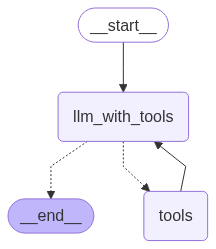

In [30]:
display_graph(app2)

In [31]:
response=app2.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and where is taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_ecSQgaSp5oXOpQgAzzkUv5kL)
 Call ID: call_ecSQgaSp5oXOpQgAzzkUv5kL
  Args:
    a: 5
    b: 4
  search_web (call_jPiHmLA3iLVR8u7ebx8d7bC9)
 Call ID: call_jPiHmLA3iLVR8u7ebx8d7bC9
  Args:
    user_question: Where is Taj Mahal located?
================================= Tool Message =================================
Name: multiply_numbers

20
================================= Tool Message =================================
Name: search_web

[{"url": "https://en.wikipedia.org/wiki/Taj_Mahal", "title": "Taj Mahal - Wikipedia", "content": "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India. It was commissioned in 1631 by the", "score": 0.9057319, "raw_content": null}, {"url": "https://

In [33]:
app2.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and where is taj mahal', additional_kwargs={}, response_metadata={}, id='84afea2a-6c61-44cb-9cb3-597e7ee02f46'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qHSwGbiCAvmfJM7Knz5zeyh9', 'function': {'arguments': '{"a": 5, "b": 4}', 'name': 'multiply_numbers'}, 'type': 'function'}, {'id': 'call_FF2EBWgtsYrqnUrsq8GvJCxv', 'function': {'arguments': '{"user_question": "Where is Taj Mahal located?"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 352, 'total_tokens': 406, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-Bz3gff69JbdDtjiBNrksVO4goBzBY', 'service_tier

In [34]:
app2.invoke({"messages":"What is 5 multiplied by 4 and add 15 to it"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and add 15 to it', additional_kwargs={}, response_metadata={}, id='705bb041-8615-4a47-8663-baae9f107c9d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_e8LMEuXiusa9uzpfEpNDj1Oa', 'function': {'arguments': '{"a": 5, "b": 4}', 'name': 'multiply_numbers'}, 'type': 'function'}, {'id': 'call_KlfIWIh1cKPqqfOWPfFpK2Uw', 'function': {'arguments': '{"a": 0, "b": 15}', 'name': 'add_numbers'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 353, 'total_tokens': 405, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-Bz50fA1rljcCNr9BUbdbsCxjsCIFx', 'service_tier': 'default', 'finish_reason': 'tool

## Inbuilt ReACT agent by langgraph

In [35]:
from langgraph.prebuilt import create_react_agent

In [36]:
react_agent = create_react_agent(
    model=model,
    tools=tools_list
)


In [37]:
react_agent.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})

{'messages': [HumanMessage(content='What is 5 multiplied by 4 and where is taj mahal', additional_kwargs={}, response_metadata={}, id='8a27adbb-0c58-4417-a49b-68f836714c57'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_H39tsRzH9VAEPvdtcEG4u6Hx', 'function': {'arguments': '{"a": 5, "b": 4}', 'name': 'multiply_numbers'}, 'type': 'function'}, {'id': 'call_02ZOIaqz8XxyEwqACiueBpzN', 'function': {'arguments': '{"user_question": "Where is Taj Mahal located?"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 352, 'total_tokens': 406, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-Bz5838q4ywKIIlF0RkvHKNil0CBMJ', 'service_tier